In [91]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import statistics
import pydotplus 
from matplotlib import pyplot as plt
from IPython.display import Image 
#import pickle                       #save model to disk
from sklearn.externals import joblib #save model to disk
import datetime

In [52]:
%matplotlib inline
plt.style.use('ggplot')

In [98]:
#resources_dir = "/Users/alfonso/code/violinDemos/ViolinTrainer/resources/MacMic_MyViolin/"
resources_dir = "/Users/alfonso/code/violinDemos/ViolinTrainer/resources/"
resource = ['Scarlett_MyViolin', 
            'Scarlett_MyViolin', 
            'Scarlett_V1',
            'MacMic_MyViolin',
            'MacMic_MyViolin',
            'MacMic_MyViolin',
            'MacMic_V2',
            'MacMic_ViolinYamaha'
           ]
filenames = [
    ['BackNoiseMaia', 'EStringScaleVibrato', 'AStringScaleVibrato', 'DStringScaleVibrato', 'GStringScaleVibrato'],
    ['BackNoiseMaia', 'EStringGliss', 'AStringGliss', 'DStringGliss', 'GStringGliss'],
    ['Silence', 'EString', 'AString', 'DString', 'GString'],
    ['Silence01', 'EString01', 'AString01', 'DString01', 'GString01'],
    ['BackNoiseMaia', 'EStringScaleVibrato', 'AStringScaleVibrato', 'DStringScaleVibrato', 'GStringScaleVibrato'],
    ['BackNoiseMaia', 'EStringGliss', 'AStringGliss', 'DStringGliss', 'GStringGliss'],
    ['Silence', 'EString', 'AString', 'DString', 'GString'],
    ['Silence01', 'EString01', 'AString01', 'DString01', 'GString01'],
]

In [99]:
# prepare dataset
# ------------- prepare dataset
Xs = []
ys = []
[n_recordings, n_strings] = np.array(filenames).shape

for iRecording in range (0, n_recordings):
    for iString in range(0, n_strings):
        inputFile = resources_dir + resource[iRecording] + "/" + filenames[iRecording][iString] + '.16bit-EnergyBankFilter.txt'
        #print("reading File: ", inputFile)
        energy_bands_dB = np.loadtxt(inputFile, skiprows=0).T
        #energy_bands= (energy_bands /120 )+1 #normalize [0-1]
        energy_bands = 10**(energy_bands_dB/20)
        rmsEnergy_dB=20*np.log10(np.sqrt(np.mean(energy_bands**2,0)))
        target = np.ones(energy_bands.shape[1]) * (iString)
        energy_bands_norm= energy_bands_dB / rmsEnergy_dB
        energy_bands_norm = energy_bands_norm /4

        n_frames = energy_bands.shape[1]
        for frame_i in range(n_frames):
            # Creating our sliding window
            frames = energy_bands_norm[:, frame_i]
            avgString = target[frame_i]
            Xs.append(frames)
            ys.append(int(avgString))
  
Xs = np.array(Xs)
ys = np.array(ys)
print("Xs.shape:", Xs.shape, ", ys.shape:", ys.shape)

('Xs.shape:', (600278, 40), ', ys.shape:', (600278,))


As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples:

In [132]:
doRandomForests = 1
if doRandomForests:
    print('random forests')
    mtype='randomForests'
    clf = RandomForestClassifier(n_estimators=10)
else:
    mtype='decissionTree'
    clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xs, ys)

random forests


In [133]:
#save model to disk
now = datetime.datetime.now()
save_path = "./models/string_" + mtype + "_" + now.strftime("%Y%m%d_%H%M") + ".pkl"
joblib.dump(clf, save_path) #'decissionTree.pkl')

['./models/string_randomForests_20170418_1826.pkl']

if we have Python module pydotplus installed, we can generate a PDF file (or any other supported file type) directly in Python.

In [93]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=['B1','B2','B3','B4','B5','B6','B7','B8','B9',
                                       'B10','B11','B12','B13','B14','B15','B16','B17','B18','B19',
                                       'B20','B21','B22','B23','B24','B25','B26','B27','B28','B29',
                                       'B30','B31','B32','B33','B34','B35','B36','B37','B38','B39','B40'],  
                         class_names=['XX', 'S1','S2','S3','S4'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("string_random.pdf") 
#Image(graph.create_png()) 

True

The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. IPython notebooks can also render these plots inline using the Image() function:

------ prediction ----

After being fitted, the model can then be used to predict the class of samples. Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

In [134]:
Xs_i_test = []
ys_i_test = []

iRecording = 0
iString= 1
#inputFile = resources_dir + resource[iRecording] + "/" + filenames[iRecording][iString] + '.16bit-EnergyBankFilter.txt'
inputFile = resources_dir + 'Scarlett_MyViolin/' + filenames[iRecording][iString]  + '.16bit-EnergyBankFilter.txt'
print("reading File: ", inputFile)
energy_bands_dB = np.loadtxt(inputFile, skiprows=0).T
#energy_bands= (energy_bands /120 )+1 #normalize [0-1]
energy_bands = 10**(energy_bands_dB/20)
rmsEnergy_dB=20*np.log10(np.sqrt(np.mean(energy_bands**2,0)))
target = np.ones(energy_bands.shape[1]) * (iString)
energy_bands_norm= energy_bands_dB / rmsEnergy_dB
energy_bands_norm = energy_bands_norm /4

n_frames = energy_bands.shape[1]
for frame_i in range(n_frames):
    # Creating our sliding window
    frames = energy_bands_norm[:, frame_i]
    avgString = target[frame_i]
    Xs_i_test.append(frames)
    ys_i_test.append(int(avgString))
  
Xs_i_test = np.array(Xs_i_test)
ys_i_test = np.array(ys_i_test)
print("Xs_i_test.shape:", Xs_i_test.shape, ", ys_i_test.shape:", ys_i_test.shape)

('reading File: ', '/Users/alfonso/code/violinDemos/ViolinTrainer/resources/Scarlett_MyViolin/EStringScaleVibrato.16bit-EnergyBankFilter.txt')
('Xs_i_test.shape:', (22080, 40), ', ys_i_test.shape:', (22080,))


In [135]:
#load model from disk
#clf2=joblib.load(clf, 'decissionTree.pkl')
prediction=clf.predict(Xs_i_test)
#clf.predict_proba([[2., 2.]])
test_correct_prediction = prediction == ys_i_test
test_accuracy= np.mean(test_correct_prediction)
print("accuracy: ", test_accuracy)

('accuracy: ', 0.99877717391304344)


(-0.5, 4.5)

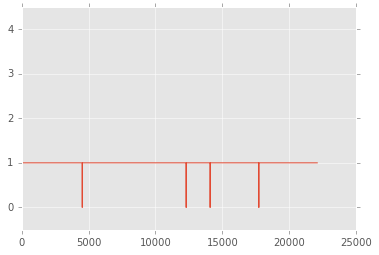

In [136]:
plt.plot(prediction)
axes = plt.gca()
axes.set_ylim([-0.5,4.5])
#plt.plot(ys_i_test)